In [40]:
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

In [41]:

config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [42]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [43]:
class_labels = []
file_name = 'labels.txt'
with open(file_name,'rt') as fpt:
    classlabels = fpt.read().rstrip('\n').split('\n')

In [44]:
print(classlabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrus']


In [45]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0000020BC3EB21F0>

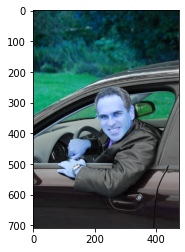

In [46]:
img = cv2.imread('manandcar.png')
img1 = cv2.imread('manandcar2.png')
#plt.imshow(img)
plt.imshow(img1)

In [47]:
ClassIndex, confidence ,bbox = model.detect(img1,confThreshold=0.5)
print(ClassIndex)

[1 3]


In [48]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for classInd, conf ,boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
    cv2.rectangle(img1,boxes,(255,0,0),2)
    cv2.putText(img1,classlabels[classInd-1],(boxes[0]+10,boxes[1]+40) , font , fontScale=font_scale,color=(0,255,0),thickness=1)

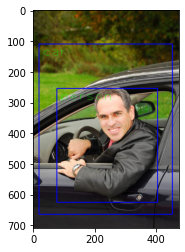

In [49]:
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))

In [52]:
cap = cv2.VideoCapture(0)

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()
    ClassIndex ,confidence,bbox = model.detect(frame,confThreshold=0.55)

    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for classInd,conf,boxes,in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
            if(classInd<=80):
                cv2.rectangle(frame,boxes,(255,0,0),2)
                cv2.putText(frame,classlabels[classInd-1],(boxes[0]+10,boxes[1]+40) , font , fontScale=font_scale,color=(0,255,0),thickness=1)

    cv2.imshow('OBJECTS',frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()



[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[ 1  1 33]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[ 1  1 33]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[ 1  1 33]
[1 1]
[1 1]
[ 1  1 33]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[ 1  1 77]
[1 1]
[1 1]
[1 1]
[ 1  1 62]
[1]
[1 1]
[1]
[1]
[ 1 62  1]
[ 1 62]
[ 1 62  1]
[ 1 62  1]
[ 1 62  1]
[ 1 62]
[1]
[1]
[1 1]
[62  1  1]
[62  1  1]
[1 1]
[1]
[ 1 62]
[ 1 62]
[1]
[1]
[ 1  1 62]
[1 1]
[ 1  1 62]
[1 1]
[ 1 62  1]
[ 1  1 62]
[ 1 62  1]
[ 1  1 62]
[ 1  1 62]
[ 1  1 62]
[62  1  1 62]
[ 1 62  1 62  1 62]
[62  1  1 62 62]
[ 1 62  1]
[62  1  1 62]
[62  1  1 62]
[62  1  1 62]
[ 1  1 62]
[ 1 62  1]
[ 1  1 62]
[ 1  1 62]
[ 1  1 62]
[ 1  1 62]
[ 1 62  1]
[ 1 62  1 62]
[ 1  1 62]
[ 1  1 62]
[ 1 62  1 62]
[ 1 62  1]
[62  1  1 62]
[62  1  1 62]
[62  1  1 62 62 62]
[ 1 62  1]
[62  1  1 62 62 62]
[ 1  1 62]
[ 1  1 62]
[ 1 62  1 62]
[ 1  1 62]
[ 1  1 62]
[62  1  1]
[62  1  1]
[ 1 62  1]
[ 1 62  1]
[ 1  1 62]
